In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
crop = pd.read_csv("/content/crop_recommendation.csv")
crop.head(5)

,Nitrogen,Phosphorus,Potasium,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potasium     2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.describe()

,Nitrogen,Phosphorus,Potasium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.columns

Index(['Nitrogen', 'Phosphorus', 'Potasium', 'temperature', 'humidity', 'ph',
       'rainfall', 'Crop'],
      dtype='object')

In [ ]:
crop['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop['Crop'].nunique()

22

In [ ]:
crop['Crop'].value_counts()

,count
Crop,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


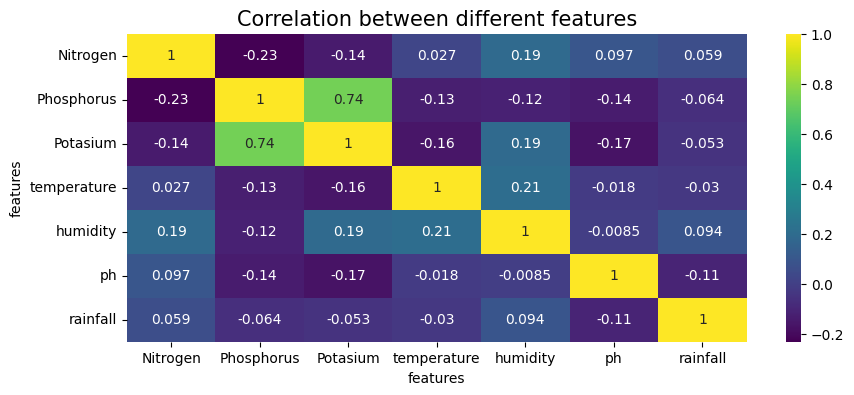

In [ ]:
# Understanding Dataset

df = crop.drop('Crop', axis =1)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

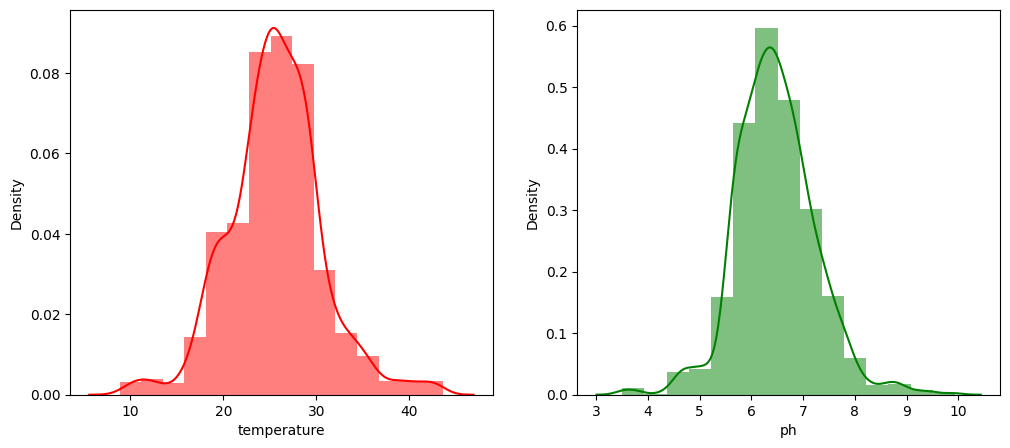

In [ ]:
# features distibution
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(crop['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['ph'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.show()

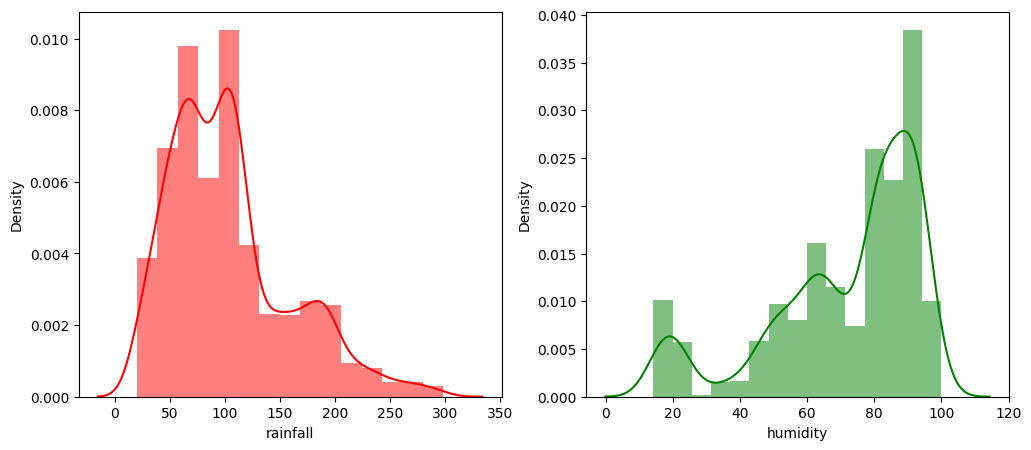

In [ ]:
# features distibution
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(crop['rainfall'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['humidity'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.show()

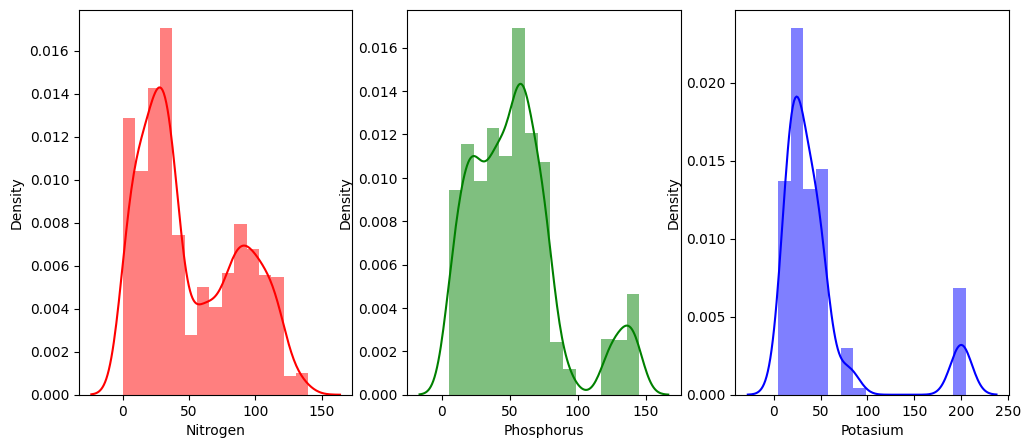

In [ ]:
# features distibution
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.distplot(crop['Nitrogen'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 3, 2)
sns.distplot(crop['Phosphorus'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 3, 3)
sns.distplot(crop['Potasium'],color="blue",bins=15,hist_kws={'alpha':0.5})
plt.show()

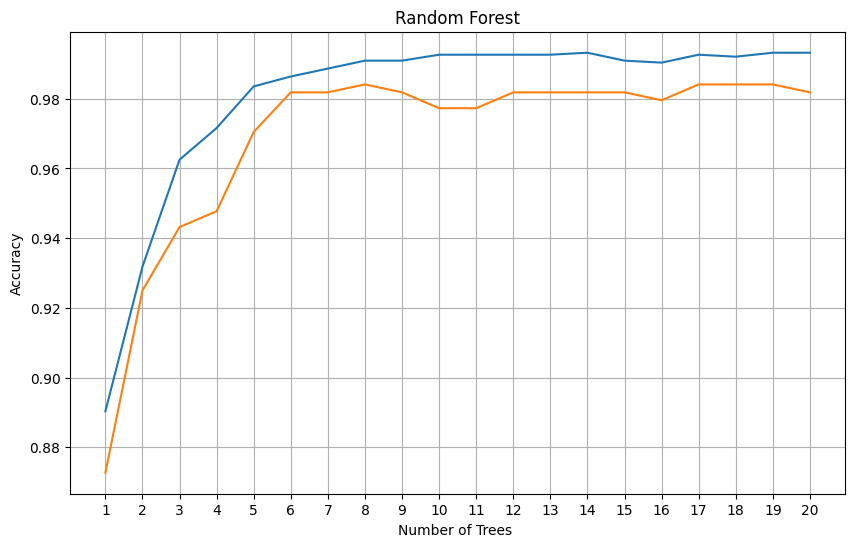

In [ ]:
from sklearn.metrics import accuracy_score
features = crop[['Nitrogen', 'Phosphorus','Potasium','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['Crop']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

from sklearn.ensemble import RandomForestClassifier

train_accuracies=[]
test_accuracies=[]
for i in range(1, 21):
  RF = RandomForestClassifier(
      n_estimators=i,max_depth=7,min_samples_split=5,min_samples_leaf=3,max_features='sqrt',random_state=0)
  RF.fit(x_train,y_train)
  y_pred_test = RF.predict(x_test)
  y_pred_train = RF.predict(x_train)
  train_accuracies.append(accuracy_score(y_pred_train,y_train))
  test_accuracies.append(accuracy_score(y_pred_test,y_test))

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), train_accuracies)
plt.plot(range(1,21), test_accuracies)
plt.grid(True)
plt.xticks(loc)
plt.title('Random Forest')
plt.xlabel('Number of Trees ')
plt.ylabel('Accuracy')
plt.show()

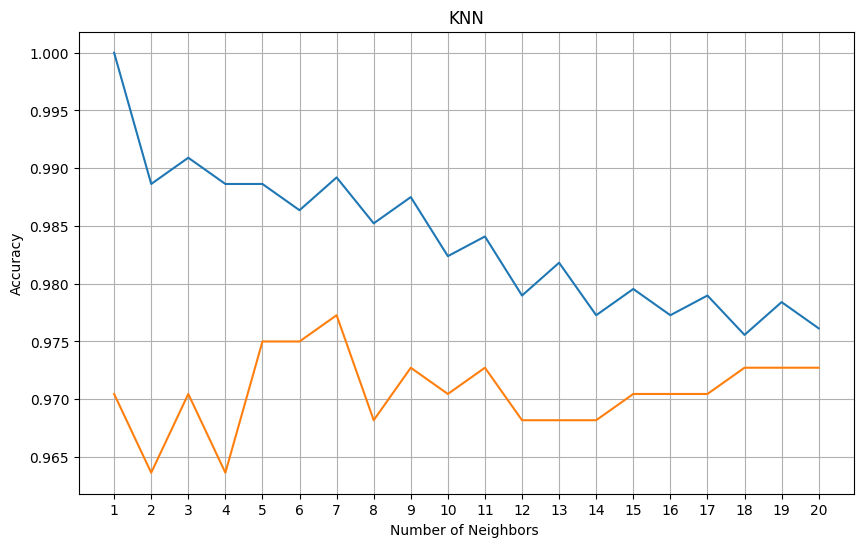

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies=[]
test_accuracies=[]
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred_test = knn.predict(x_test)
  y_pred_train = knn.predict(x_train)
  train_accuracies.append(accuracy_score(y_pred_train,y_train))
  test_accuracies.append(accuracy_score(y_pred_test,y_test))

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), train_accuracies)
plt.plot(range(1,21), test_accuracies)
plt.grid(True)
plt.xticks(loc)
plt.title('KNN')
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(x_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


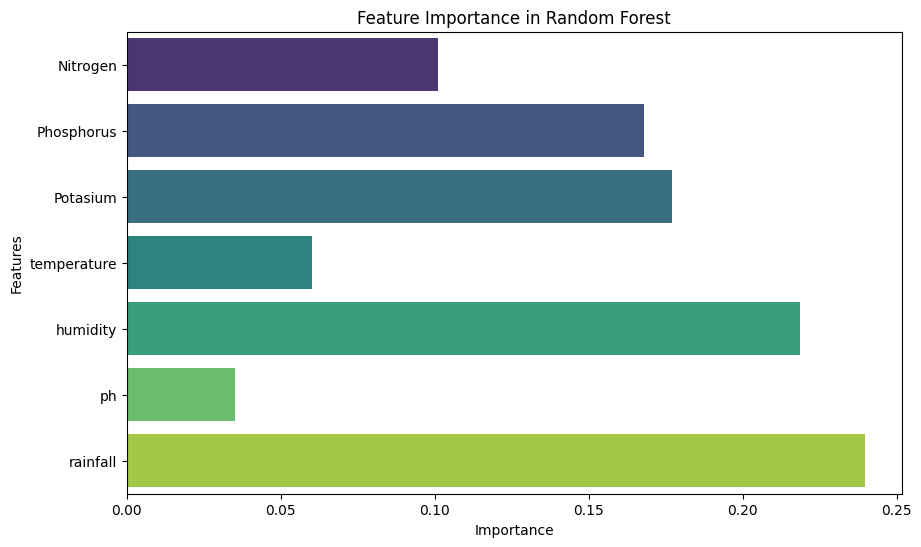

In [ ]:
importances = RF.feature_importances_
feature_names = features.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Features and Target
features = crop[['Nitrogen', 'Phosphorus', 'Potasium', 'temperature', 'humidity', 'ph', 'rainfall']]
target = crop['Crop']

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

# Regularizing Random Forest to prevent overfitting
RF = RandomForestClassifier(
    n_estimators=100,  # Increase number of estimators for better generalization
    max_depth=10,      # Limit the depth of trees
    min_samples_split=5,  # Minimum samples to split an internal node
    min_samples_leaf=2,   # Minimum samples at a leaf node
    max_features='sqrt',  # Consider sqrt(number of features) at each split
    random_state=0
)

# Training the model
RF.fit(x_train, y_train)

# Predicting and evaluating
predicted_values = RF.predict(x_test)
accuracy = accuracy_score(y_test, predicted_values)
print("Random Forest Accuracy is: ", accuracy)
print(classification_report(y_test, predicted_values))

# Cross-validation for better performance evaluation
cv_scores = cross_val_score(RF, features, target, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))

rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  0.9988636363636364
Testing accuracy =  0.990909090909091


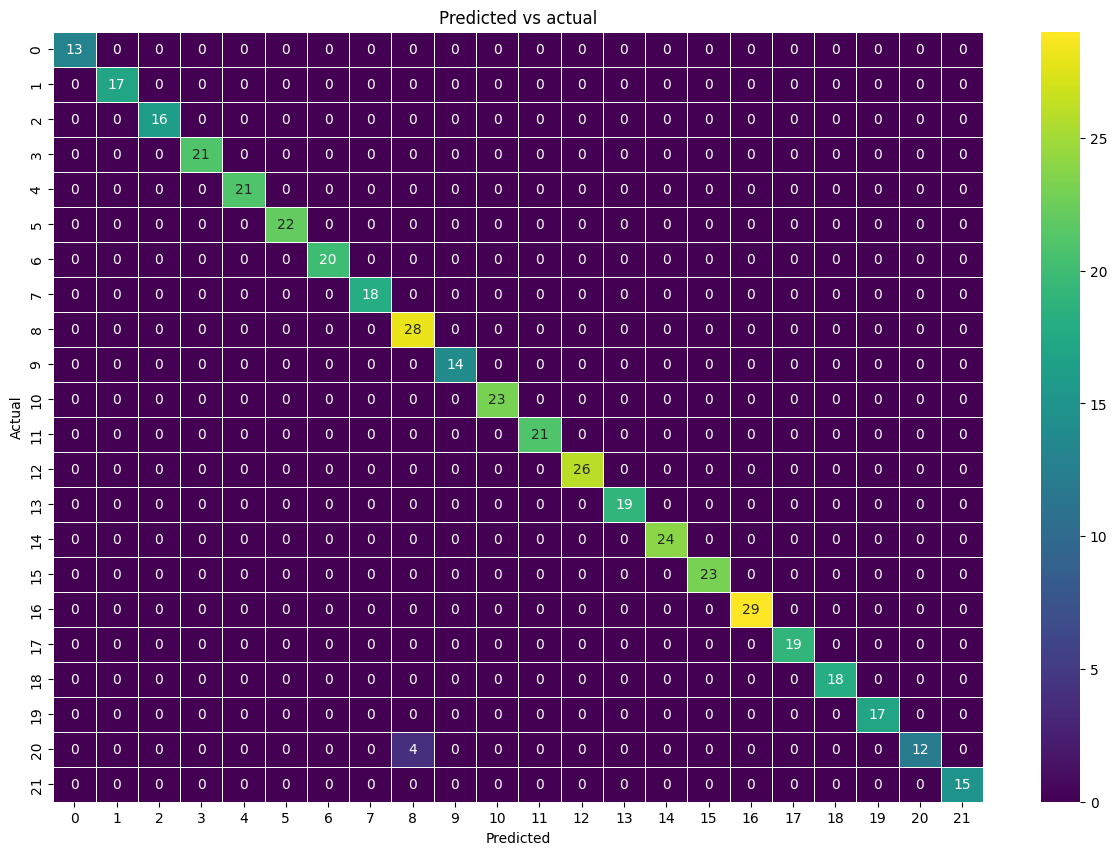

In [ ]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, predicted_values, average='weighted')
precision = precision_score(y_test, predicted_values, average='weighted')
recall = recall_score(y_test, predicted_values, average='weighted')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


F1 Score: 0.9905627705627705
Precision: 0.9920454545454546
Recall: 0.990909090909091
